In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.ticker import *
from sklearn.datasets import load_iris

In [13]:
#default값 설정
rcParams['figure.figsize'] = [10, 10] 
sns.set(style='darkgrid')
rcParams['scatter.edgecolors'] = 'black'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.unicode.east_asian_width', True)


In [24]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data,
                    columns = iris_dataset.feature_names)
labels = iris_dataset.target_names
iris['species'] = iris_dataset.target
iris.species = iris.species.apply(lambda x:labels[x])
iris.species = iris.species.astype('category')
iris.info()
print(iris.head())
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [17]:
iris.isna().sum() #결측치 확인

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [18]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [19]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [27]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [28]:
iris.columns = ['SL','SW','PL','PW','species']

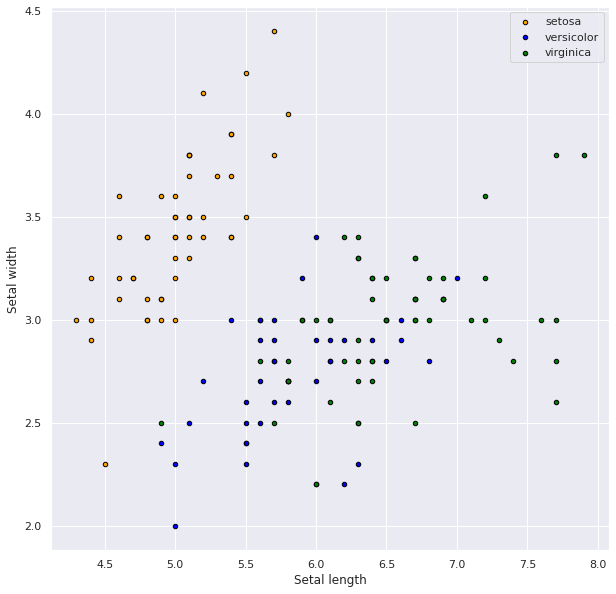

In [37]:
axes = iris[iris.species=='setosa'].plot(kind='scatter',
                                         x='SL', y='SW', color='orange', label='setosa')
iris[iris.species=='versicolor'].plot(kind='scatter', ax=axes,
                                         x='SL', y='SW', color='blue', label='versicolor')
iris[iris.species=='virginica'].plot(kind='scatter', ax=axes,
                                         x='SL', y='SW', color='green', label='virginica')
axes.set_xlabel('Setal length')
axes.set_ylabel('Setal width')
plt.show()

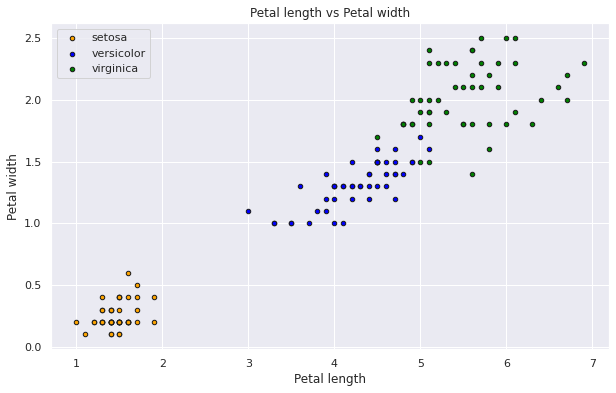

In [33]:
axes = iris[iris['species']=='setosa'].plot(kind='scatter',
        x='PL', y='PW',
        color='orange', label='setosa', edgecolor='k')
iris[iris['species']=='versicolor'].plot(kind='scatter',
        x='PL', y='PW',
        color='blue', label='versicolor', ax=axes, edgecolor='k')
iris[iris['species']=='virginica'].plot(kind='scatter',
        x='PL', y='PW',
        color='green', label='virginica', ax=axes, edgecolor='k')
axes.set_xlabel('Petal length')
axes.set_ylabel('Petal width')
axes.set_title('Petal length vs Petal width')
plt.show()

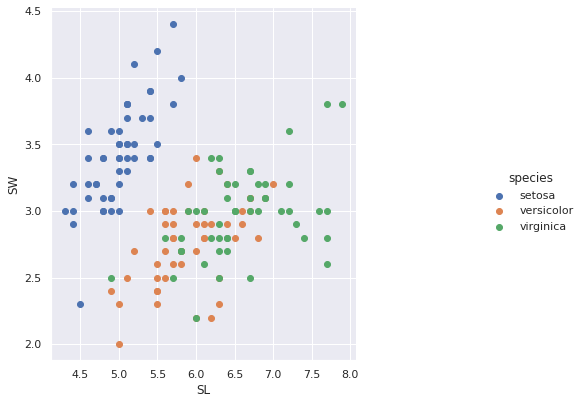

In [38]:
sns.FacetGrid(iris, hue='species').map(plt.scatter, 'SL','SW').add_legend()
fig = plt.gcf()
fig.set_size_inches(10,7)
fig.show()

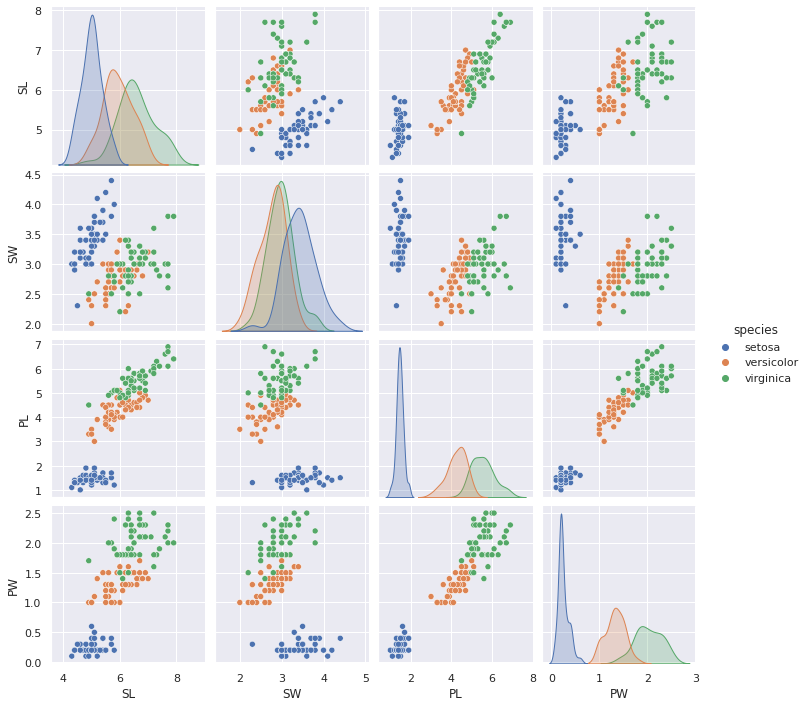

In [39]:
sns.pairplot(iris, hue='species')
plt.show()

In [41]:
from plotly.express import scatter_3d
fig = scatter_3d(iris, x='SL', 
                 y='PL', z='PW',
                 color='SW', symbol='species', size='PL', size_max=18, opacity=0.7)
fig.show()

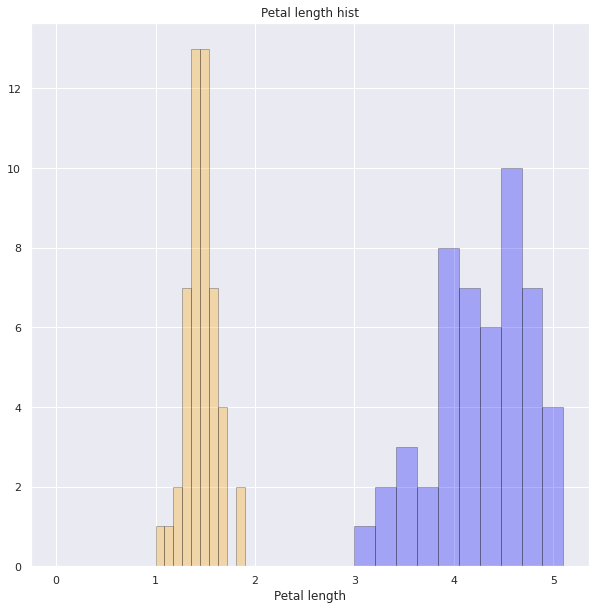

In [42]:
axes = iris[iris['species']=='setosa']['PL'].hist(
    color='orange', label='setosa',
    edgecolor='k', bins=10, alpha=0.3)
iris[iris['species']=='versicolor']['PL'].hist(
    color='blue', label='versicolor', ax=axes,
    edgecolor='k', bins=10, alpha=0.3)
iris[iris['species']=='verginica']['PL'].hist(
    color='green', label='verginica', ax=axes,
    edgecolor='k', bins=10, alpha=0.3)
axes.set_xlabel('Petal length')
axes.set_title('Petal length hist')
plt.show()

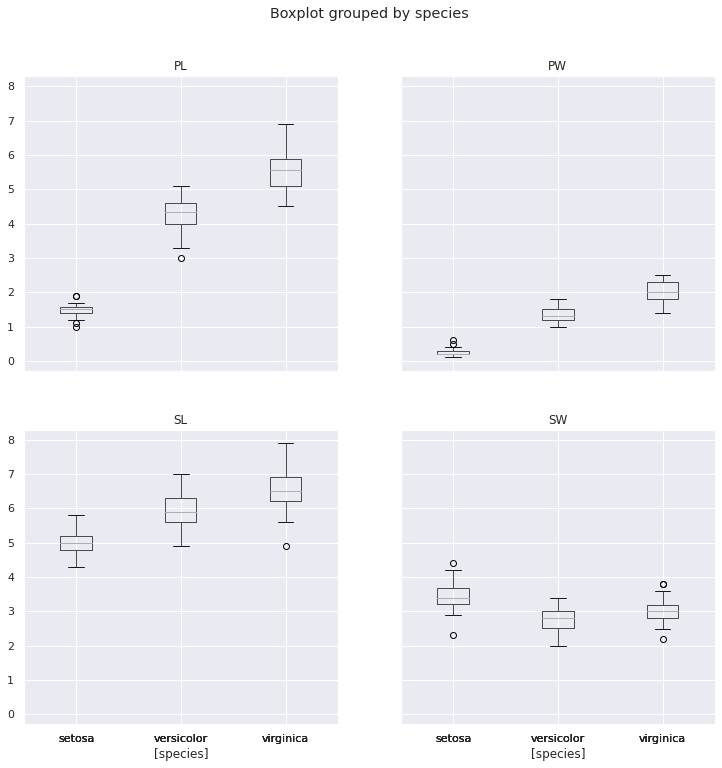

In [44]:
iris.boxplot(by='species', figsize=(12,12))   # o 는 이상치
plt.show()

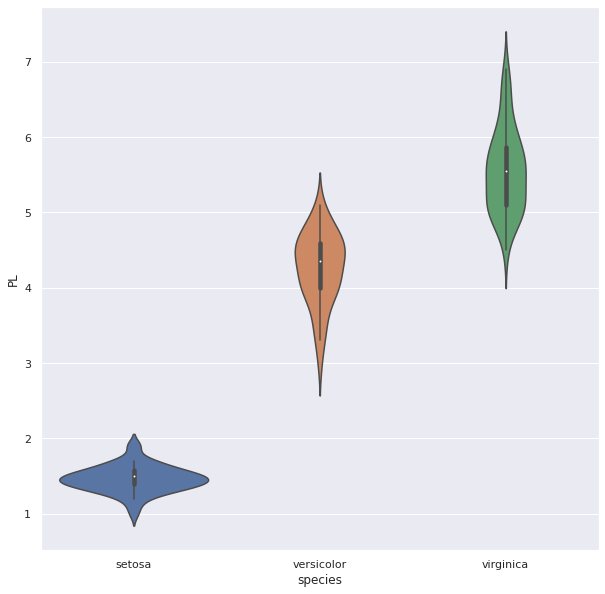

In [47]:
plt.figure()
plt.subplot(1,1,1)
sns.violinplot(x='species', y='PL', data=iris)
plt.show()